In [1]:
from erddapy import ERDDAP


e = ERDDAP(server="https://data.ioos.us/gliders/erddap")

In [2]:
min_lat, max_lat = 20, 30
min_lon, max_lon = -82, -97
        
kw = {
    "standard_name": "sea_water_temperature",
    "min_lon": min_lon,
    "max_lon": max_lon,
    "min_lat": min_lat,
    "max_lat": max_lat,
    "min_time": "2018-01-10T00:00:00Z",
    "max_time": "2018-07-13T00:00:00Z",
    "cdm_data_type": "trajectoryprofile"
}

In [3]:
import pandas as pd


search_url = e.get_search_url(response="csv", **kw)

search = pd.read_csv(search_url)
gliders = search["Dataset ID"].values
print("Found {} Glider Datasets:\n{}".format(len(gliders), "\n".join(gliders)))

Found 3 Glider Datasets:
ng429-20180701T0000
Reveille-20180627T1500
Sverdrup-20180509T1742


In [4]:
server = "https://data.ioos.us/gliders/erddap"

dataset_id = "Sverdrup-20180509T1742"

variables = [
 "depth",
 "latitude",
 "longitude",
 "salinity",
 "temperature",
 "time",
]

In [5]:
from erddapy import ERDDAP


e = ERDDAP(
    server=server,
    protocol="tabledap",
)

e.dataset_id = dataset_id
e.variables = variables
        
print(
    e.get_download_url(
        response="mat",
    )
)

https://data.ioos.us/gliders/erddap/tabledap/Sverdrup-20180509T1742.mat?depth,latitude,longitude,salinity,temperature,time


In [6]:
df = e.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
    skiprows=(1,)
).dropna()

df.index = df.index.tz_convert(None)
df.head()

,depth (m),latitude (degrees_north),longitude (degrees_east),salinity (1),temperature (Celsius)
time (UTC),,,,,
2018-05-09 17:42:20,9.943779,27.866188,-93.587218,35.845436,25.0770
2018-05-09 17:42:20,11.374212,27.866188,-93.587218,35.847050,25.0591
2018-05-09 17:42:20,12.745035,27.866188,-93.587218,35.850310,25.0548
2018-05-09 17:42:20,13.688713,27.866188,-93.587218,35.855020,25.0467
2018-05-09 17:42:20,14.483385,27.866188,-93.587218,35.859070,25.0319


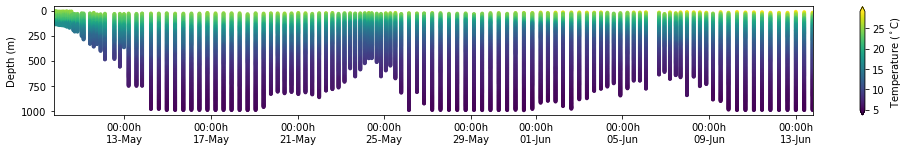

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df["depth (m)"], s=15, c=df["temperature (Celsius)"],
                marker="o", edgecolor="none")

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter("%H:%Mh\n%d-%b")
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation="vertical", extend="both")
cbar.ax.set_ylabel("Temperature ($^\circ$C)")
ax.set_ylabel("Depth (m)");

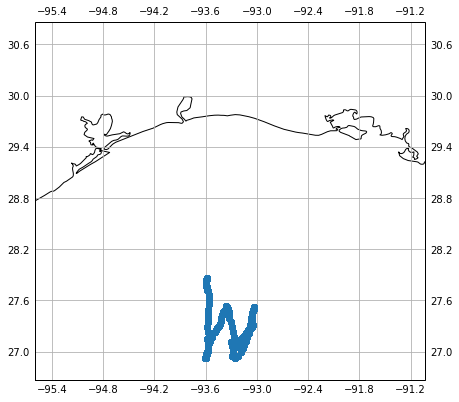

In [8]:
import cartopy.crs as ccrs


fig, ax = plt.subplots(
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=(7, 7)
)

ax.plot(df["longitude (degrees_east)"], df["latitude (degrees_north)"], "o")
ax.gridlines(draw_labels=True)
ax.coastlines("10m")
ax.set_extent(
    [
        df["longitude (degrees_east)"].min()-2, df["longitude (degrees_east)"].max()+2,
        df["latitude (degrees_north)"].min()-0.25, df["latitude (degrees_north)"].max()+3
    ]
);